In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from torch.utils.data import DataLoader, TensorDataset

# Logistic regression
We will use the `make_blobs` function to generate the data

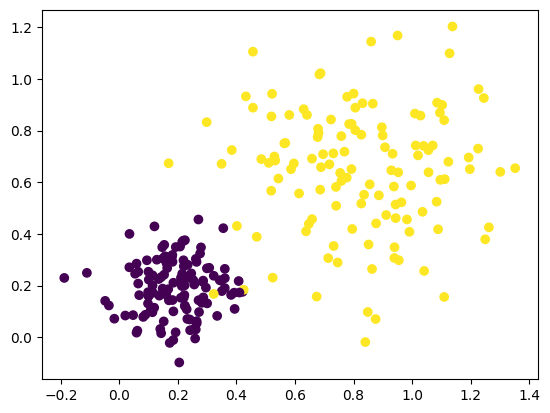

In [4]:
X,y = make_blobs(
    n_samples=250,
    n_features=2,
    centers=[[.2, .2],[.8,.6]],
    cluster_std=[.1,.25]
)
# Convert to tensor and create dataloader
dataset = TensorDataset(torch.Tensor(X), torch.Tensor(y.reshape(-1,1)))
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

plt.scatter(X[:,0], X[:,1], c=y)

Create a class `LogisticRegression`, extending `nn.Module`. In its initialization, create a `Linear` layer ($D \mapsto 1$) and a `Sigmoid` one. You could also use two outputs and softmax. Create a forward method that applies the linear layer and then the sigmoid one. The forward method should return the output of the sigmoid layer.

In [ ]:
class LogisticRegression(nn.Module): #Erbt alle Funktionen des nn.Modules
    def __init__(self, input_dimensions):
        super().__init__()
        self.linear = nn.Linear(in_features = input_dimensions, out_features = 1)

    def forward(self,x): #So definiert man die forward FUnktion in nn.Module um
        return torch.sigmoid(self.linear(x))

In [6]:
mod = LogisticRegression(input_dimensions=2)

Define the loss function (in this case binary cross entropy) and an optimizer (for example SGD)

In [ ]:
loss_fun = nn.BCELoss() # Select apropriate loss function e.g. nn.BCELoss(), braucht ein Sigmoid (0,1) als y_pred
optimizer = optim.SGD(mod.parameters(), lr=0.1)

Iterate a training step

In [ ]:
epochs = 500

# We wish to save the trajectory of weight, bias and loss
hist_W = []
hist_b = []
hist_loss = []

#Trainigsloop bleibt auch bei mehrschichtigen Netzen gleich
for epoch in range(epochs):
    pred = mod(torch.Tensor(X))  # Forward pass, Output wird berechnet, hier wird die neu definierte forward Methode verwendet
    loss = loss_fun(pred, torch.Tensor(y).view(-1, 1))  # Compute loss

    optimizer.zero_grad() #Gradienten auf Null setzen
    loss.backward() # Berechne den Gradienten
    optimizer.step() # Optimierungsschritt nach Gradient Descent 


    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")


Epoch 0: Loss = 0.7264
Epoch 50: Loss = 0.6007
Epoch 100: Loss = 0.5160
Epoch 150: Loss = 0.4521
Epoch 200: Loss = 0.4029
Epoch 250: Loss = 0.3640
Epoch 300: Loss = 0.3328
Epoch 350: Loss = 0.3072
Epoch 400: Loss = 0.2859
Epoch 450: Loss = 0.2679


Great! Let us have a look at the predictions:

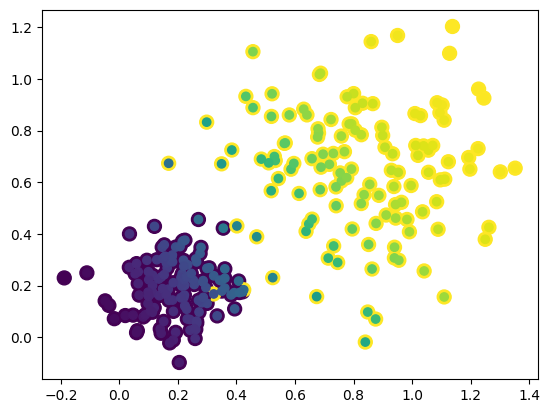

In [19]:
preds = mod(torch.Tensor(X)).detach().numpy()

plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.scatter(X[:,0], X[:,1], c=preds)

As you can see, the points are assigned a probability of being in class 1 (yellow) which match the original labels.

## Decision boundary
However, we may want to investigate what decisions is assigned to any given combination of the features. In this case, since the data is 2 dimensional, we can create a grid and evaluate the model on it.

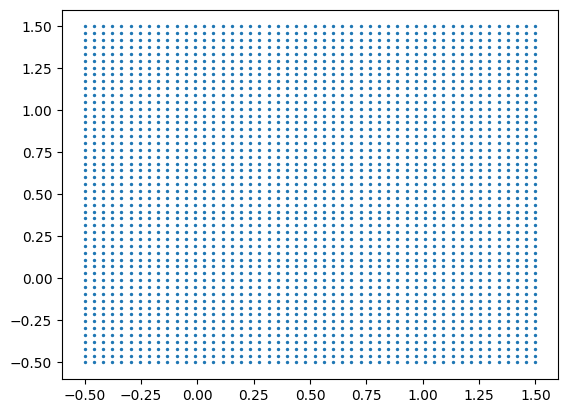

In [20]:
res = 50
grid_1D = np.linspace(-.5, 1.5, res)
xx,yy = np.meshgrid(grid_1D, grid_1D)

X_grid = np.column_stack((xx.flatten(), yy.flatten()))

plt.scatter(X_grid[:,0], X_grid[:,1],s=2)

X_grid = torch.Tensor(X_grid)

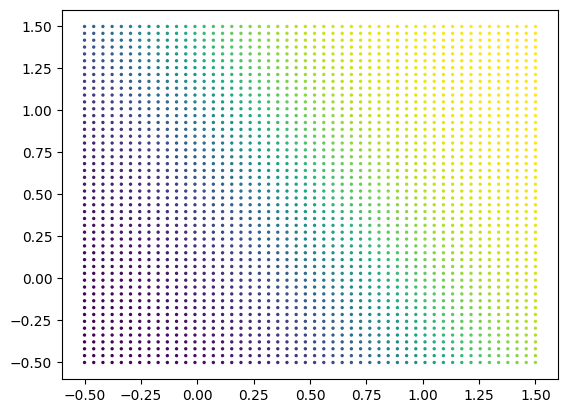

In [21]:
preds = mod(X_grid).detach().numpy()
plt.scatter(X_grid[:,0], X_grid[:,1],c=preds, s=2)

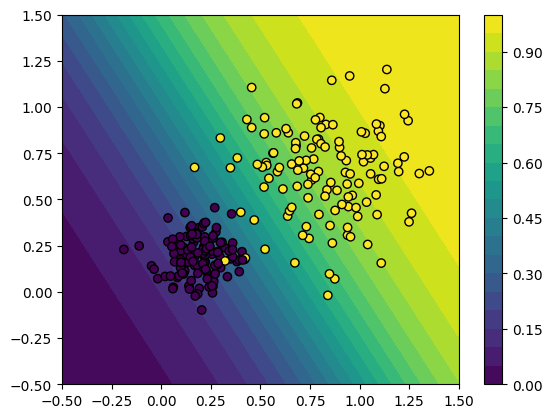

In [22]:
plt.contourf(grid_1D, grid_1D, preds.reshape(res,res), levels=20)
plt.colorbar()
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k')